In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import pymarket as pm

# Creates new market

In [2]:
r = np.random.RandomState(1234)
mar = pm.Market()
    
mar.accept_bid(1, 6.7, 0, True, 0)
mar.accept_bid(1, 6.6, 1, True, 0)
mar.accept_bid(1, 6.5, 2, True, 0)
mar.accept_bid(1, 6.4, 3, True, 0)
mar.accept_bid(1, 6.3, 4, True, 0)
mar.accept_bid(1, 6, 5, True, 0)

mar.accept_bid(1, 1, 6, False, 0)
mar.accept_bid(1, 2, 7, False, 0)
mar.accept_bid(2, 3, 8, False, 0)
mar.accept_bid(2, 4, 9, False, 0)
mar.accept_bid(1, 6.1, 10, False, 0)

bids = mar.bm.get_df()
transactions, extras = mar.run('muda', r=r)
stats = mar.statistics()

## Orignal supply and demand curves

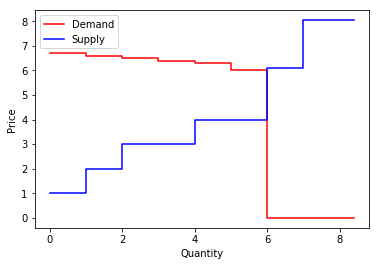

In [3]:
mar.plot()

## Supply and demand curves after market is splitted

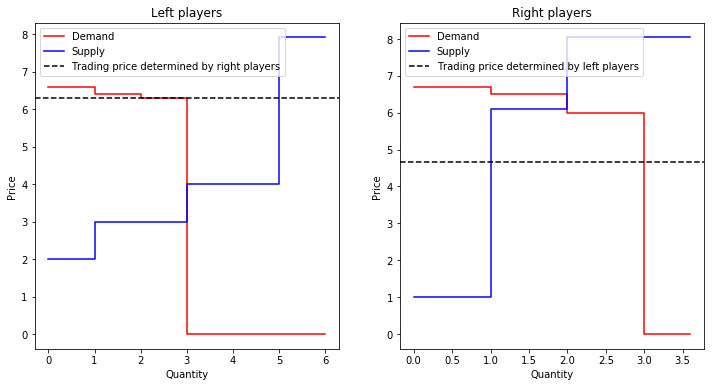

In [4]:
ax = mar.plot_method('muda')

## Analysis of the Left Side

### Participants

* Buying: 1, 3, 4
* Selling: 7, 8, 9

### Trading price

* $6.3$

### Results

* The long side is the supply, all demand side buys as much as they want
* The demand side pays no fees, they are the short side
* Bid 7, results in bid 9 not trading a unit, so the fee is $ 1 \times (6.3 - 4) = 2.3$
* Bid 8, results in bid 9 not trading a 2 units so the fee is $2 \times (6.3 - 4) = 4.6$

## Analysis of the Right Side

### Participants

* Buying: 0, 2, 5
* Selling: 6, 10 (10 does not trade because bid price is greater than trading price)

### Trading price

* 4.65

### Results

* The long side is the demand, all supply side buys as much as they want
* The supply side pays no fees, they are the short side
* Bid 0, results in bid 2 not trading a unit, so the fee is $ 1 \times (6.5 - 4.65) = 1.85$

# Statistics

In [5]:
print('Percentage of the maximum possible traded quantity')
stats['percentage_traded']

Percentage of the maximum possible traded quantity


0.6666666666659999

In [6]:
print('Percentage of the maximum possible total welfare')
stats['percentage_welfare']

Percentage of the maximum possible total welfare


0.7906976744186046

In [7]:
print('Profits per user')
for u in bids.user.unique():
    print(f'User {u:2} obtained a profit of {stats["profits"]["player_bid"][u]:0.2f}')

Profits per user
User  0 obtained a profit of 2.05
User  1 obtained a profit of 0.30
User  2 obtained a profit of 0.00
User  3 obtained a profit of 0.10
User  4 obtained a profit of 0.00
User  5 obtained a profit of 0.00
User  6 obtained a profit of 3.65
User  7 obtained a profit of 4.30
User  8 obtained a profit of 6.60
User  9 obtained a profit of 0.00
User 10 obtained a profit of 0.00


In [8]:
print(f'Profit to Market Maker was {stats["profits"]["market"]:0.2f}')

Profit to Market Maker was 8.75
